In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# This notebook is for analysation of generated dataset

In [5]:
data = pd.read_csv('./data/data_with_tags/fine-tune-test-data-test-2.csv', converters={'tags': literal_eval}) # Loading current dataset

In [6]:
data

,names,sentence,tags,source
0,"['Appalachian Mountains', 'Great Smoky Mountai...","The Appalachian Mountains, stretching across t...","[O, B-mount, I-mount, O, O, O, O, O, O, O, O, ...",HUMAN
1,"['Tien Shan Range', 'Celestial Mountains', 'Kh...","The Tien Shan Range in Central Asia, known as ...","[O, B-mount, I-mount, I-mount, O, O, O, O, O, ...",HUMAN
2,['Drakensberg Mountains'],"South Africa's Drakensberg Mountains, with its...","[O, O, O, B-mount, I-mount, O, O, O, O, O, O, ...",HUMAN
3,"['Hotakadake', 'Yarigatake', 'Southern Alps']","The Southern Alps of Japan, including the Hota...","[O, B-mount, I-mount, O, O, O, O, O, B-mount, ...",HUMAN
4,"['Rocky Mountains', 'Banff', 'Mount Robson']",The Rocky Mountains in Canada showcase the stu...,"[O, B-mount, I-mount, O, O, O, O, O, O, O, B-m...",HUMAN
...,...,...,...,...
266,"['Mount Abao', ""Pigne d'Arolla""]",The rugged peaks of Mount Abao and Pigne d'Aro...,"[O, O, O, O, B-mount, I-mount, O, B-mount, I-m...",GPT
267,"['Marmolejo', 'Makra Peak']",The majestic heights of Marmolejo and Makra Pe...,"[O, O, O, O, B-mount, O, B-mount, I-mount, O, ...",GPT
268,['Mount Bierstadt'],"Mount Bierstadt rises proudly, its rocky slope...","[B-mount, I-mount, O, O, O, O, O, O, O, O, O, ...",GPT
269,['Raynolds Peak'],"Raynolds Peak looms in the distance, its cragg...","[B-mount, I-mount, O, O, O, O, O, O, O, O, O, ...",GPT


## Number of Tokens

In this section I will analyse the number of tokens dataset contains

In [11]:
unique_tags = set()
for index in range(len(data)):
    temp = set(data.iloc[index]['tags'])
    unique_tags = unique_tags.union(temp)

<BarContainer object of 3 artists>

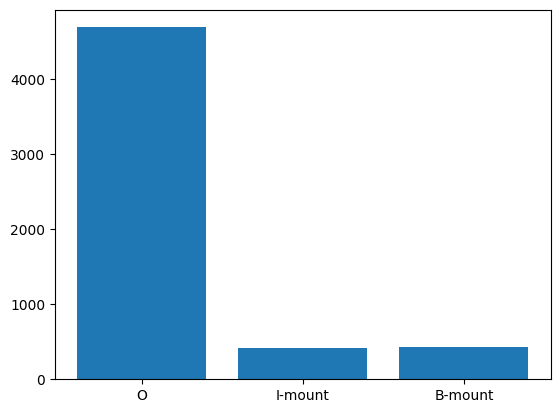

In [28]:
quantity_dict = {key: 0 for key in unique_tags}
for entry in data['tags']:
    for tag in entry:
        quantity_dict[tag] += 1

plt.bar(quantity_dict.keys(), list(quantity_dict.values()), .8)

{'O': [2376, 2317], 'I-mount': [126, 289], 'B-mount': [163, 270]}


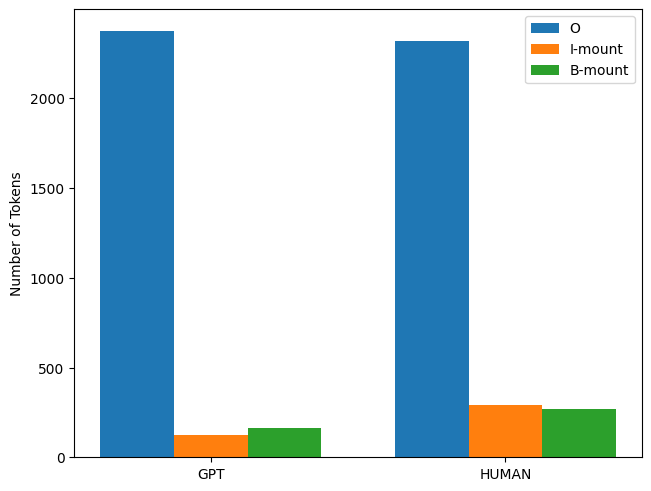

In [44]:
quantity_dict_human = {key: 0 for key in unique_tags}
quantity_dict_gpt = {key: 0 for key in unique_tags}

human_data = data[data['source'] == 'HUMAN']
for entry in human_data['tags']:
    for tag in entry:
        quantity_dict_human[tag] += 1

gpt_data = data[data['source'] == 'GPT']
for entry in gpt_data['tags']:
    for tag in entry:
        quantity_dict_gpt[tag] += 1

quantity_dict = {key: [] for key in unique_tags}
for key, value in quantity_dict_human.items():
    quantity_dict[key].append(value)

for key, value in quantity_dict_gpt.items():
    quantity_dict[key].append(value)

print(quantity_dict)

figure, axes = plt.subplots(layout='constrained')
indeces = np.arange(2)
x = 0
width = 0.25
for tag, quantity in quantity_dict.items():
    offset = x * width
    axes.bar(indeces + offset, quantity, width)
    x += 1
axes.set_ylabel('Number of Tokens')
axes.set_xticks(indeces + width, ['GPT', 'HUMAN'])
axes.legend(unique_tags)
plt.show() 

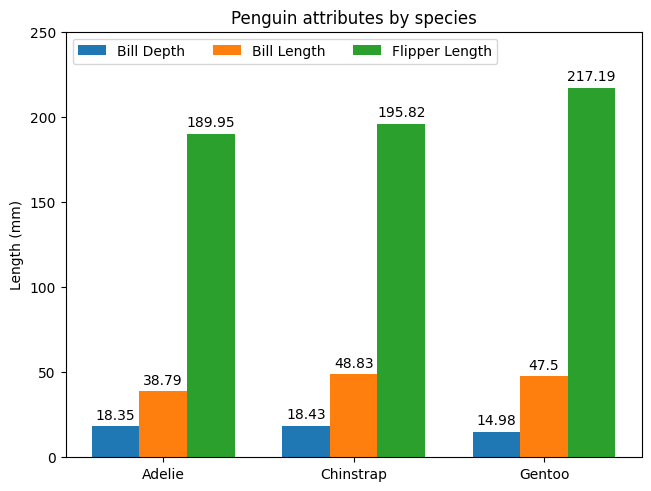

In [30]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

## Analysing the number of symbols